-----------
Initializing structure...
time for choose_chunkdivision = 6.50883e-05 s
Working in 2D dimensions.
Computational cell is 13 x 13 x 0 with resolution 10
time for set_epsilon = 0.021452 s
-----------


FloatProgress(value=0.0, description='0% done ', max=400.0)

Normalizing field data...
run 0 finished at t = 400.0 (8000 timesteps)
Generating MP4...


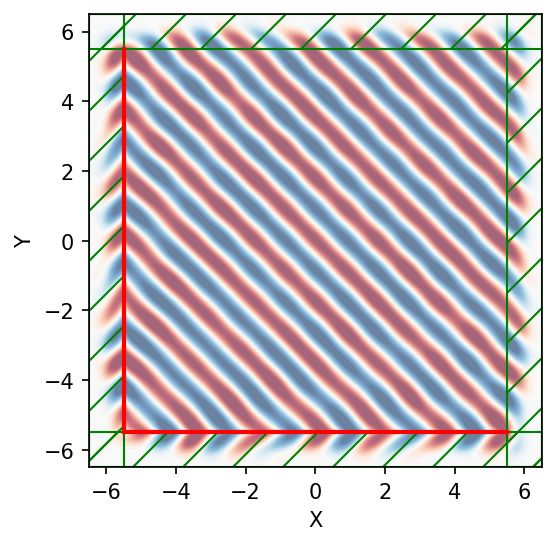

In [23]:
# This example creates an approximate Ez-polarized planewave in vacuum (2D simulation with PML)
# propagating at a 45-degree angle, by using a couple of current sources
# with amplitude exp(ikx) corresponding to the desired planewave.
from __future__ import division
import matplotlib.pyplot as plt
import cmath
import math
import meep as mp
from IPython.display import Video

s = 11  # the size of the computational cell, not including PML
dpml = 1  # thickness of PML layers

sxy = s + 2 * dpml  # cell size, including PML
cell = mp.Vector3(sxy, sxy, 0)

pml_layers = [mp.PML(dpml)]
resolution = 10


# pw-amp is a function that returns the amplitude exp(ik(x+x0)) at a
# given point x.  (We need the x0 because current amplitude functions
# in Meep are defined relative to the center of the current source,
# whereas we want a fixed origin.)  Actually, it is a function of k
# and x0 that returns a function of x ...
def pw_amp(k, x0):
    def _pw_amp(x):
        return cmath.exp(1j * k.dot(x + x0))
    return _pw_amp

fcen = 0.8  # pulse center frequency
df = 0.02  # turn-on bandwidth
kdir = mp.Vector3(1, 1)  # direction of k (length is irrelevant)
n = 1 # refractive index of material containing the source
k = kdir.unit().scale(2 * math.pi * fcen * n)  # k with correct length

sources = [
    mp.Source(
        mp.ContinuousSource(fcen, fwidth=df),
        component=mp.Ez,
        center=mp.Vector3(-0.5 * s, 0),
        size=mp.Vector3(0, s),
        amp_func=pw_amp(k, mp.Vector3(x=-0.5 * s))
    ),
    mp.Source(
        mp.ContinuousSource(fcen, fwidth=df),
        component=mp.Ez,
        center=mp.Vector3(0, -0.5 * s),
        size=mp.Vector3(s, 0),
        amp_func=pw_amp(k, mp.Vector3(y=-0.5 * s))
    )
]

sim = mp.Simulation(
    cell_size=cell,
    sources=sources,
    boundary_layers=pml_layers,
    resolution=resolution,
    default_material=mp.Medium(index=n),
)

t = 400  # run time
f = plt.figure(dpi=150)
Animate = mp.Animate2D(sim, fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(4,Animate), until=t)

# Process the animation and view it
filename = "angle.mp4"
Animate.to_mp4(5,filename)
Video(filename)

In [24]:
# This example creates an approximate Ez-polarized planewave in vacuum (3D simulation with PML)
# propagating at a 45-degree angle, by using a couple of current sources
# with amplitude exp(ikx) corresponding to the desired planewave.
from __future__ import division
import matplotlib.pyplot as plt
import cmath
import math
import meep as mp
from IPython.display import Video

s = 11  # the size of the computational cell, not including PML
dpml = 1  # thickness of PML layers

sxy = s + 2 * dpml  # cell size, including PML
cell = mp.Vector3(sxy, sxy, sxy)

pml_layers = [mp.PML(dpml)]
resolution = 10


# pw-amp is a function that returns the amplitude exp(ik(x+x0)) at a
# given point x.  (We need the x0 because current amplitude functions
# in Meep are defined relative to the center of the current source,
# whereas we want a fixed origin.)  Actually, it is a function of k
# and x0 that returns a function of x ...
def pw_amp(k, x0):
    def _pw_amp(x):
        return cmath.exp(1j * k.dot(x + x0))
    return _pw_amp

fcen = 0.8  # pulse center frequency
df = 0.02  # turn-on bandwidth
kdir = mp.Vector3(1, 1)  # direction of k (length is irrelevant)
n = 1 # refractive index of material containing the source
k = kdir.unit().scale(2 * math.pi * fcen * n)  # k with correct length

sources = [
    mp.Source(
        mp.ContinuousSource(fcen, fwidth=df),
        component=mp.Ez,
        center=mp.Vector3(-0.5 * s, 0,0),
        size=mp.Vector3(0, s,s),
        amp_func=pw_amp(k, mp.Vector3(x=-0.5 * s))
    ),
    mp.Source(
        mp.ContinuousSource(fcen, fwidth=df),
        component=mp.Ez,
        center=mp.Vector3(0, -0.5 * s,0),
        size=mp.Vector3(s, 0, s),
        amp_func=pw_amp(k, mp.Vector3(y=-0.5 * s))
    )
]

sim = mp.Simulation(
    cell_size=cell,
    sources=sources,
    boundary_layers=pml_layers,
    resolution=resolution,
    default_material=mp.Medium(index=n),
)

t = 400  # run time
f = plt.figure(dpi=150)
volume=mp.Block(size=mp.Vector3(sxy,sxy,0), center=mp.Vector3())
Animate = mp.Animate2D(sim,output_plane=volume, fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(4,Animate), until=t)

# Process the animation and view it
filename = "angle3D.mp4"
Animate.to_mp4(5,filename)
Video(filename)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000257969 s
Working in 3D dimensions.
Computational cell is 13 x 13 x 13 with resolution 10
time for set_epsilon = 3.41368 s
-----------


FloatProgress(value=0.0, description='0% done ', max=400.0)

Meep progress: 2.35/400.0 = 0.6% done in 4.0s, 677.0s to go
on time step 48 (time=2.4), 0.0839402 s/step
Meep progress: 8.5/400.0 = 2.1% done in 8.0s, 368.8s to go
on time step 171 (time=8.55), 0.0325604 s/step
Meep progress: 14.65/400.0 = 3.7% done in 12.0s, 316.1s to go
on time step 294 (time=14.7), 0.0325836 s/step
Meep progress: 20.6/400.0 = 5.2% done in 16.0s, 295.4s to go
on time step 413 (time=20.65), 0.0338037 s/step
Meep progress: 26.55/400.0 = 6.6% done in 20.1s, 282.1s to go
on time step 532 (time=26.6), 0.0337376 s/step


-----------
Initializing structure...
time for choose_chunkdivision = 2.28882e-05 s
Working in 2D dimensions.
Computational cell is 13 x 13 x 0 with resolution 10
time for set_epsilon = 0.0180299 s
-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=400.0)

Normalizing field data...
run 0 finished at t = 400.0 (8000 timesteps)


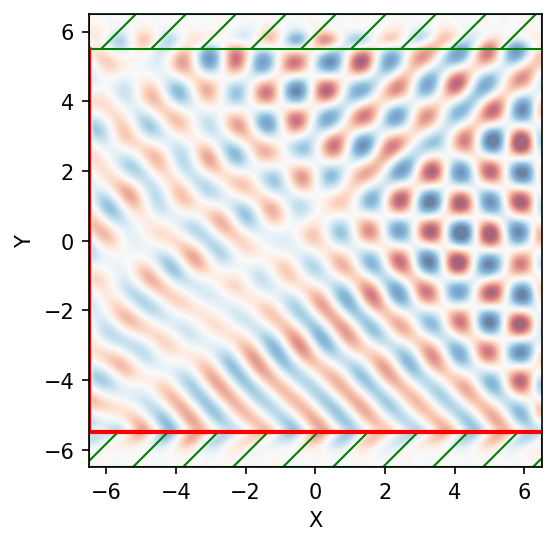

In [16]:
# This example creates an approximate Ez-polarized planewave in vacuum (2D simulation, periodic)
# propagating at a 45-degree angle, by using a couple of current sources
# with amplitude exp(ikx) corresponding to the desired planewave.
from __future__ import division
import matplotlib.pyplot as plt
import cmath
import math
import meep as mp
from IPython.display import Video

s = 11  # the size of the computational cell, not including PML
dpml = 1  # thickness of PML layers

sxy = s + 2 * dpml  # cell size, including PML
cell = mp.Vector3(sxy, sxy, 0)

pml_layers = [mp.PML(thickness=dpml, direction=mp.Y)]
resolution = 10


# pw-amp is a function that returns the amplitude exp(ik(x+x0)) at a
# given point x.  (We need the x0 because current amplitude functions
# in Meep are defined relative to the center of the current source,
# whereas we want a fixed origin.)  Actually, it is a function of k
# and x0 that returns a function of x ...
def pw_amp(k, x0):
    def _pw_amp(x):
        return cmath.exp(1j * k.dot(x + x0))
    return _pw_amp

fcen = 0.8  # pulse center frequency
df = 0.02  # turn-on bandwidth
kdir = mp.Vector3(1, 1)  # direction of k (length is irrelevant)
n = 1 # refractive index of material containing the source
k = kdir.unit().scale(2 * math.pi * fcen * n)  # k with correct length

sources = [
    mp.Source(
        mp.ContinuousSource(fcen, fwidth=df),
        component=mp.Ez,
        center=mp.Vector3(-0.5 * sxy, 0),
        size=mp.Vector3(0, s,),
        amp_func=pw_amp(k, mp.Vector3(x=-0.5 * s))
    ),
    mp.Source(
        mp.ContinuousSource(fcen, fwidth=df),
        component=mp.Ez,
        center=mp.Vector3(0, -0.5 * s),
        size=mp.Vector3(sxy, 0),
        amp_func=pw_amp(k, mp.Vector3(y=-0.5 * s))
    )
]

sim = mp.Simulation(
    cell_size=cell,
    sources=sources,
    k_point=k,
    boundary_layers=pml_layers,
    resolution=resolution,
    default_material=mp.Medium(index=n),
)

t = 400  # run time
f = plt.figure(dpi=150)
Animate = mp.Animate2D(sim, fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(4,Animate), until=t)

# Process the animation and view it
filename = "angle_per2D.mp4"
Animate.to_mp4(5,filename)
Video(filename)
